### Build a model to predict performance of employees, based on the visualisation and analysis of past data of employee performance 

- Teach for India has approximately 900+ fellows who are deployed across 7 cities and are working with 28000 students. Many of these students do not have the reading and numeracy skills required at their grade level. The ability to predict employee performance will enable TFI to implement learning and development measures to empower their fellows to improve the reading levels of their students.
- Here, I will use Python to create an HR analytics tool that can help a talent management team to predict employee performance and plan for their growth.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the Data into the dataframe

In [2]:
#reading data into the df dataframe
df = pd.read_csv('Test_Data.csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [3]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


### Data Cleaning

In [4]:
#renaming some of the column names
df.rename(columns={'department':'employee_work_department','region':'employee_region','education':'employee_education_level','gender':'employee_gender','recruitment_channel':'employee_recruitment_channel','no_of_trainings':'no_of_trainings_of_employee','age':'employee_age','previous_year_rating':'employee_previous_year_rating','length_of_service':'employee_length_of_service','KPIs_met >80%':'employee_met_KPI > 80%','awards_won?':'employee_awards_won','avg_training_score':'employee_avg_training_score'}, inplace=True)
df.head()

,employee_id,employee_work_department,employee_region,employee_education_level,employee_gender,employee_recruitment_channel,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_length_of_service,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
#checking to see if any column contains null values
df.isnull().sum()

employee_id                         0
employee_work_department            0
employee_region                     0
employee_education_level         1034
employee_gender                     0
employee_recruitment_channel        0
no_of_trainings_of_employee         0
employee_age                        0
employee_previous_year_rating    1812
employee_length_of_service          0
employee_met_KPI > 80%              0
employee_awards_won                 0
employee_avg_training_score         0
dtype: int64

In the columns 'employee_education_level' and 'emplpoyee_previous_year_rating' there are some null values.

##### Variable 1: employee_education_level

In [6]:
education_value_counts=df['employee_education_level'].value_counts()

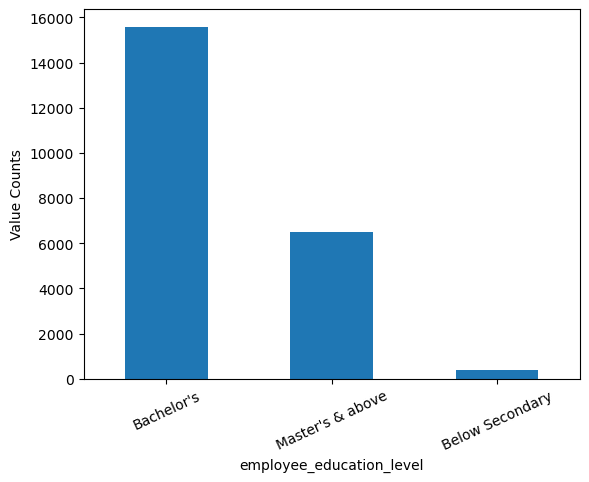

In [7]:
education_value_counts.plot(kind='bar', rot=25)
plt.ylabel('Value Counts')
plt.show()

- The dataset likely represents TFI where a Bachelor's degree is the most common educational qualification among employees.
- Employees with a Master's degree or higher are present but in a smaller proportion. 
- The 'Below Secondary' count is minimal, which may reflect minimum educational requirements for employment.

- The dataset likely represents an organization or a sector where a Bachelor's degree is the most common educational qualification among employees.
- Employees with a Master's degree or higher are present but in a smaller proportion. This could suggest that the roles in TFI do not necessarily require education beyond a Bachelor's degree, or that such qualifications are less common in the population represented.
- The 'Below Secondary' count is minimal, which may reflect minimum educational requirements for employment in the roles included in the TFI. 

In [8]:
#Treating null values in 'employee_education_level' variable

#function to replace null values with Others in the variable
def treat_null_in_education(df, col_name):
    df[col_name] = df[col_name].fillna('Others')

treat_null_in_education(df, 'employee_education_level')

To prevent data loss, I labeled the null values with 'Others'. At the end of data cleaning, the goal is to retain as much as data as possible.

In [9]:
new_education_value_counts = df['employee_education_level'].value_counts()

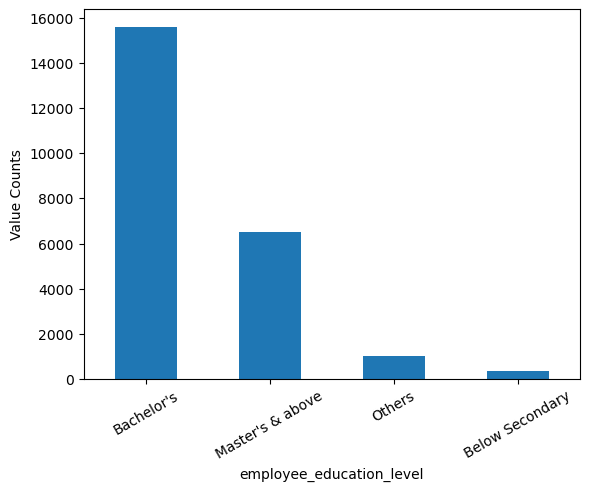

In [10]:
new_education_value_counts.plot(kind='bar', rot=30)
plt.ylabel('Value Counts')
plt.show()

The 'Others' category is now included, which contains a count of the previously missing or null data points in the 'employee_education_level' column.

##### Variable 2: employee_previous_year_rating

In [11]:
#dropping null values from the 'employee_previous_year_rating' column.
df = df.dropna(subset=['employee_previous_year_rating'])

The missing data is not significant enough to bias the results.

In [12]:
rating_value_counts = df['employee_previous_year_rating'].value_counts()

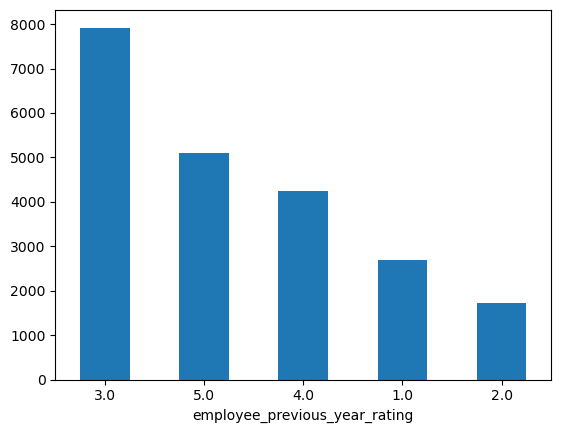

In [13]:
rating_value_counts.plot(kind='bar', rot=0)
plt.show()

- Rating '3.0' has the highest count, suggesting that most employees received a middle-of-the-road performance rating.
- The second most common rating is '5.0', indicating a significant number of employees were rated as high performers.
- Rating '4.0' is slightly less common than '5.0', but still represents a large number of employees.
- Ratings '1.0' and '2.0' are the least common, with '1.0' being the rarest. This could imply that very few employees receive the lowest performance ratings.

- The distribution of ratings suggests a standard performance curve where most employees are considered to be performing at an expected level ('3.0'), with fewer employees recognized as high ('5.0') or above average ('4.0') performers.
- The low occurrence of '1.0' and '2.0' ratings might indicate a lenient rating system, a high overall performance level, or potentially a reluctance to assign low ratings.

In [14]:
#making sure there are no more null values
df.isnull().sum()

employee_id                      0
employee_work_department         0
employee_region                  0
employee_education_level         0
employee_gender                  0
employee_recruitment_channel     0
no_of_trainings_of_employee      0
employee_age                     0
employee_previous_year_rating    0
employee_length_of_service       0
employee_met_KPI > 80%           0
employee_awards_won              0
employee_avg_training_score      0
dtype: int64

After performing data cleaning, there are no more null values present.

### Variable 3: employee_work_department

In [15]:
department_value_counts = df['employee_work_department'].value_counts()

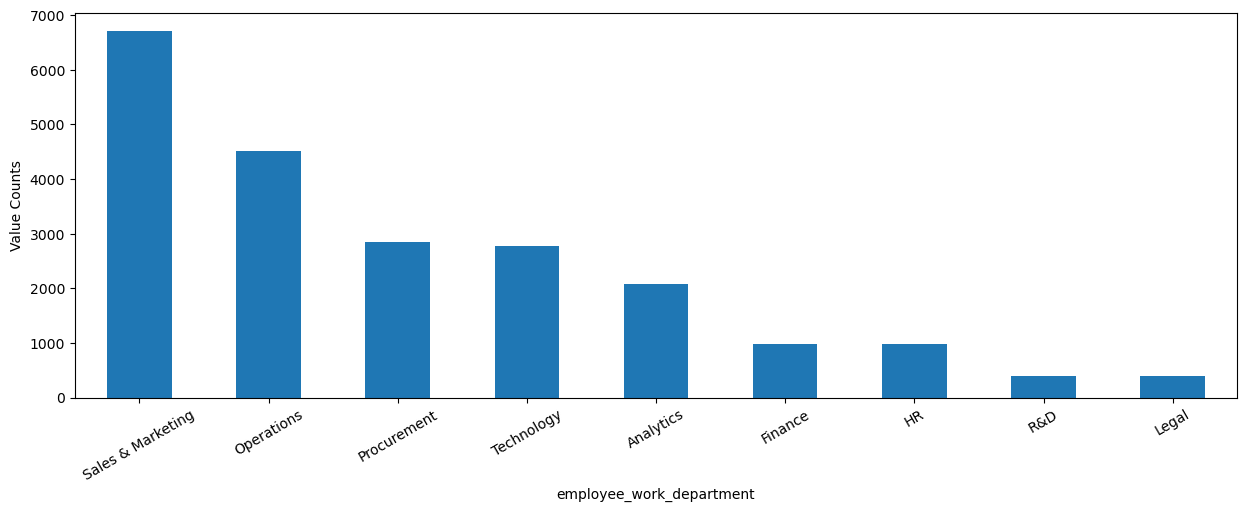

In [16]:
plt.figure(figsize=(15, 5))
department_value_counts.plot(kind='bar', rot=30)
plt.ylabel('Value Counts')
plt.show()

- ' Sales & Marketing' has the highest count, indicating that it is the largest department in terms of employee numbers in this dataset.
- The 'Operations' department follows as the second largest.
- 'Procurement' and 'Technology' have similar counts, suggesting they are smaller but comparably sized departments within the organization.
- 'Analytics', 'Finance', 'HR', 'R&D', and 'Legal' have progressively fewer employees, with 'Legal' being the smallest department.

- The visualization of 'Sales & Marketing' and 'Operations' suggests that these are likely core functions of the business, requiring the most personnel.
- The smaller size of specialized departments like 'R&D' and 'Legal' is typical for many organizations, as these functions may not require as many staff as the more central operational roles.
- Departments such as 'Analytics' and 'Finance' may be support functions that require a moderate number of employees to function effectively across the organization.

### Variable 4: employee_region

In [17]:
region_value_counts = df['employee_region'].value_counts()

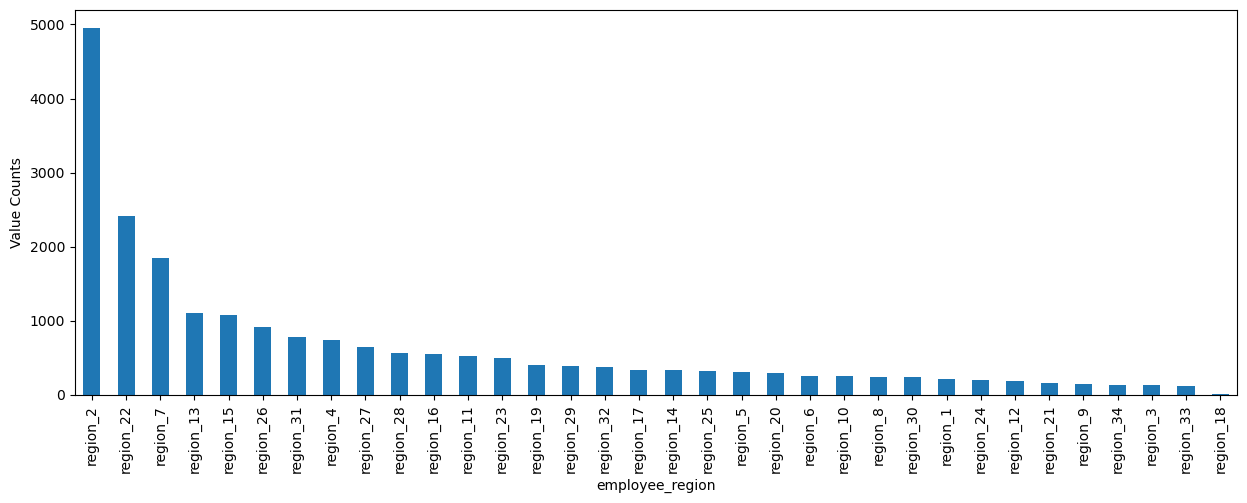

In [18]:
plt.figure(figsize=(15, 5))
region_value_counts.plot(kind='bar')
plt.ylabel('Value Counts')
plt.show()

- The 'region_2' has the highest count of employees, suggesting that this region has the largest employee base within the organization.
- The counts for other regions vary, with 'region_22', 'region_7', and 'region_15' having more employees than the rest but still significantly fewer than 'region_2'.
- The remaining regions have progressively fewer employees, with some regions having very few employees in comparison to 'region_2'.

- The organization may need to focus more HR resources and development programs in 'region_2', given its larger workforce.
- The regions with fewer employees might be areas of potential expansion or may require different management strategies due to their smaller size.

### Variable 5: employee_gender

In [19]:
gender_value_counts = df['employee_gender'].value_counts()

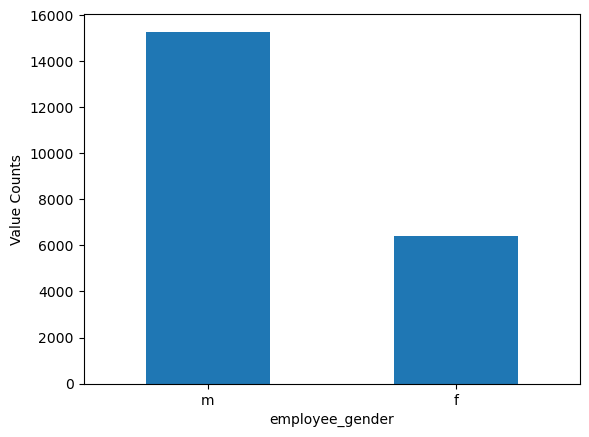

In [20]:
gender_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- There are significantly more male employees ('m') than female employees ('f') in this dataset.
- The count of male employees exceeds 14000, while the count of female employees is just over 8000.

- There is a notable gender imbalance in the workforce represented in TFI. This could reflect the hiring practices or the nature of the company.

### Variable 6: employee_recruitment_channel

In [21]:
recruitment_value_counts = df['employee_recruitment_channel'].value_counts()

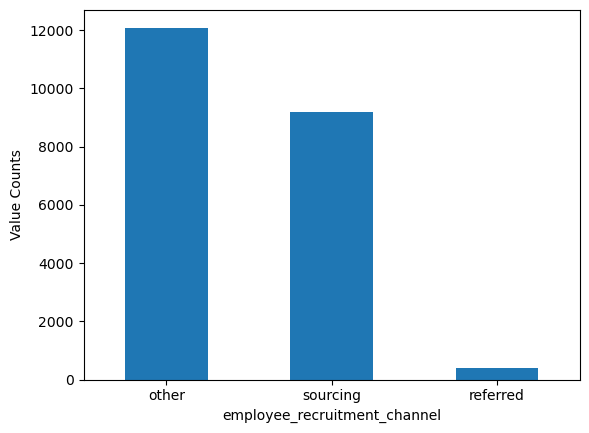

In [22]:
recruitment_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- The 'other' category has the highest count, suggesting that many employees were recruited through channels that are not explicitly labeled as 'sourcing' or 'referred'.
- 'Sourcing' is the next most common recruitment channel, with just slightly fewer counts than 'other'.
- The 'referred' category has the lowest count among the three, indicating that fewer employees were hired through referrals compared to other methods.

- The organization uses a variety of recruitment channels, with a significant portion coming from unspecified sources ('other'). These could include online job postings, career fairs, or direct applications to the company.

### Variable 7: no_of_trainings_of_employee

In [23]:
trainings_value_counts = df['no_of_trainings_of_employee'].value_counts()

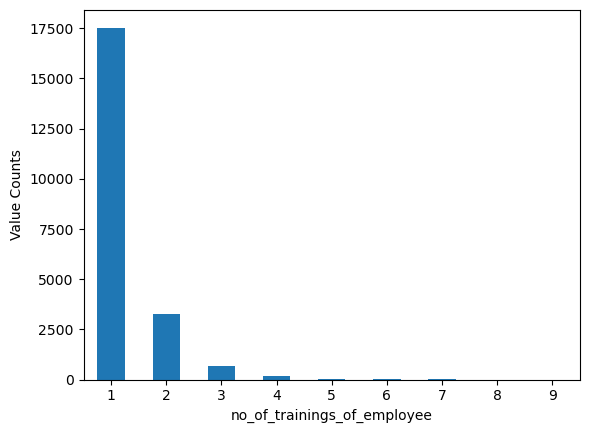

In [24]:
trainings_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- A vast majority of employees have attended only one training session, as evidenced by the first bar's height, which far exceeds that of the others.
- There is a steep decline in the number of employees who have attended two training sessions, and an even more pronounced drop for those who have attended three.
- Very few employees have attended more than three training sessions, with the numbers becoming increasingly smaller for higher counts of training attendance.

- The organization might have a policy or culture that encourages or requires all employees to undergo at least one training session.

### Variable 8: employee_age

In [25]:
age_value_counts = df['employee_age'].value_counts()

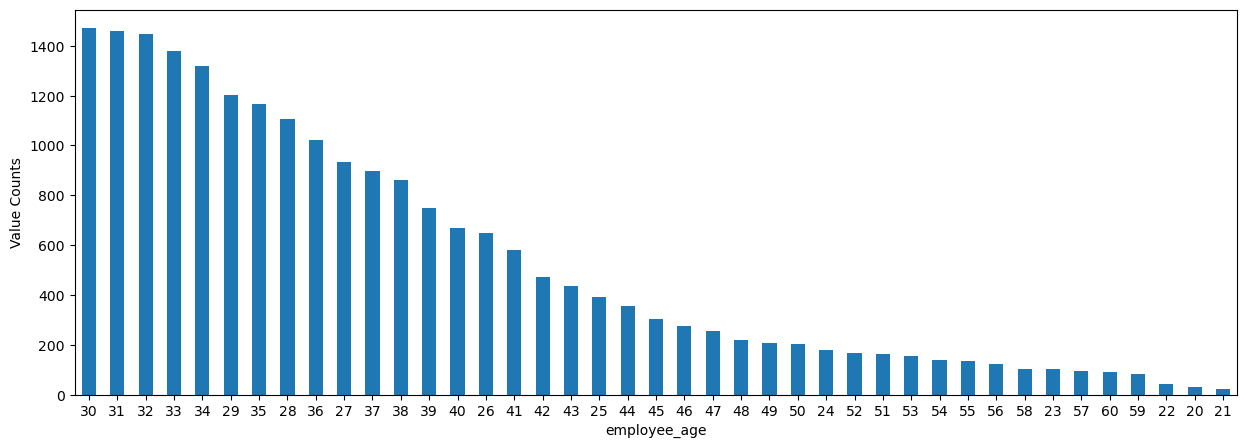

In [26]:
plt.figure(figsize=(15,5))
age_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- The workforce is predominantly in the younger age brackets, with the highest count of employees around the age of 30.
- The number of employees gradually decreases with increasing age. This is indicative of a typical age distribution in many organizations, where younger employees outnumber their older counterparts.
- There is a noticeable tapering off as age increases, with significantly fewer employees in the late 50s and early 60s.
- The chart suggests that the organization might have a relatively young workforce, which could be reflective of recent hiring trends, the nature of the industry, or the fact that employees may tend to move on or retire around a certain age.- 

### Variable 9: employee_length_of_service

In [27]:
service_value_counts = df['employee_length_of_service'].value_counts()

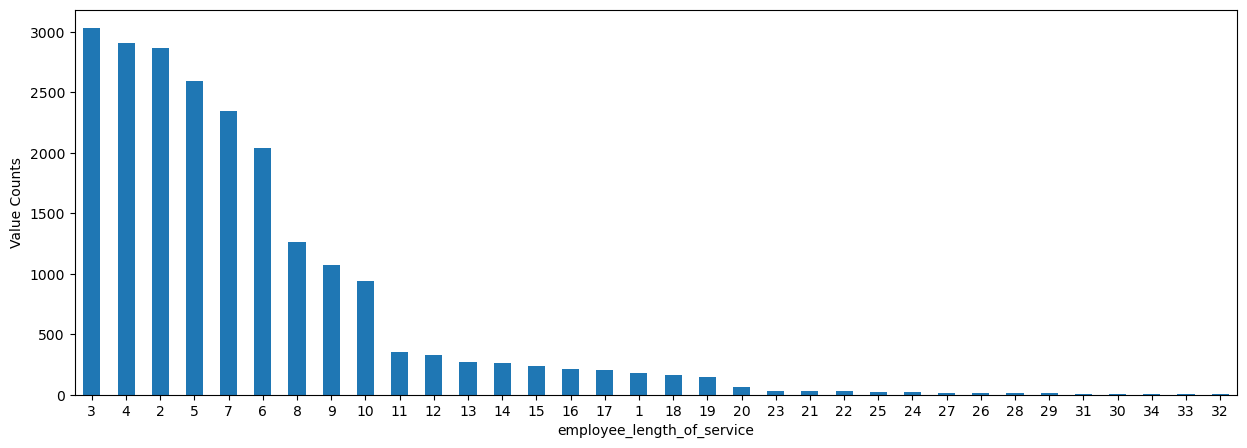

In [28]:
plt.figure(figsize=(15,5))
service_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- There is a high number of employees with a short tenure, particularly those with 3 to 5 years of service.
- The number of employees decreases as the length of service increases, which is a common pattern in many organizations.
- There is a particularly sharp decrease after the first few years, indicating that either a lot of hiring has been done in recent years, or there is a high turnover rate within the first few years of service.
- Very few employees have extremely long tenures (over 20 years), which could suggest a relatively young organization, recent expansion, or few opportunities or incentives for long-term career development within the company.

In [29]:
#employees having length of service for more than 11 years, labelling them as 'LoS More Than 11' so that all the different data types are labelled as one.
def more_than_10(value):
    if value > 10:
        return 'LoS More Than 11'
    else:
        return value  # or '10 or Less' or any other label you want to use for values 10 or below

# Apply the function to the 'length_of_service' column
df.loc[:,'employee_length_of_service'] = df['employee_length_of_service'].apply(more_than_10)

service_value_counts = df['employee_length_of_service'].value_counts()

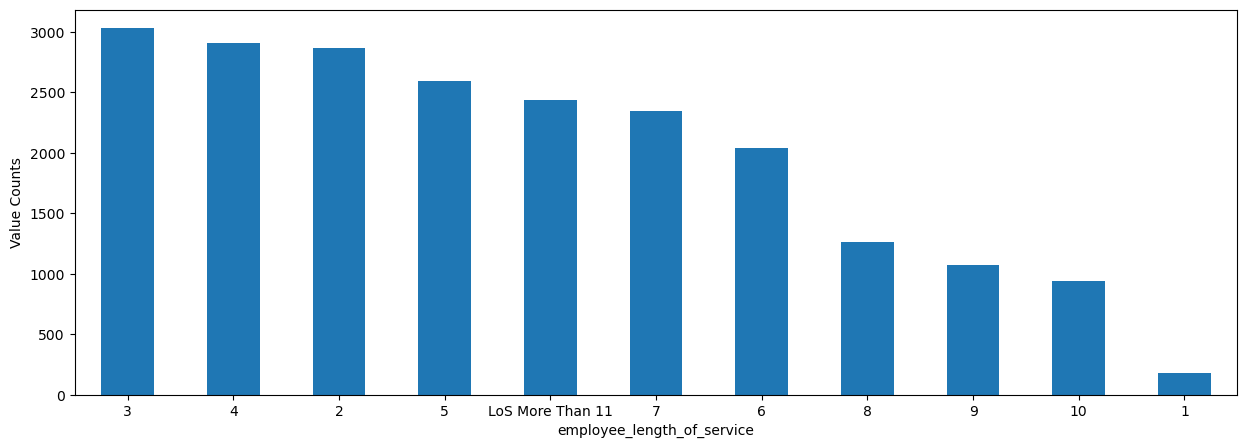

In [30]:
plt.figure(figsize=(15,5))
service_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

The category labeled "LoS More Than 11" is included, indicating that all employees with more than 11 years of service are grouped together in this bar. 

### Variable 10: employee_awards_won

In [31]:
awards_value_counts = df['employee_awards_won'].value_counts()

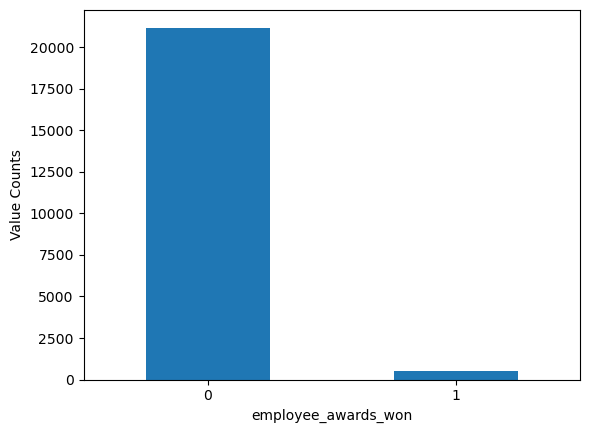

In [32]:
awards_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- A large majority of employees (indicated by the bar labeled '0') have not won any awards.
- A relatively small number of employees (indicated by the bar labeled '1') have won awards.

- Awards may be given out selectively for exceptional performance or achievements, hence only a small number of employees have received them.
- The criteria for winning awards within this organization might be stringent, making it an accomplishment that few achieve.

### Variable 11: employee_avg_trainig_score

In [33]:
#checking out the distribution of values
counts = df['employee_avg_training_score'].value_counts()

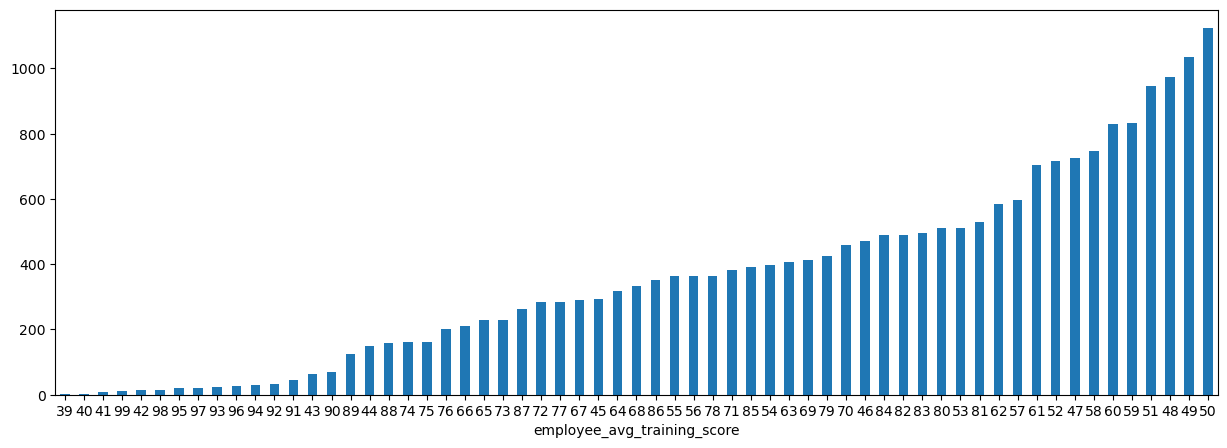

In [34]:
plt.figure(figsize=(15,5))
counts.sort_values().plot(kind='bar', rot=0)
plt.show()

### Target Variable: employee_met_KPI > 80%

In [35]:
kpi_value_counts = df['employee_met_KPI > 80%'].value_counts()

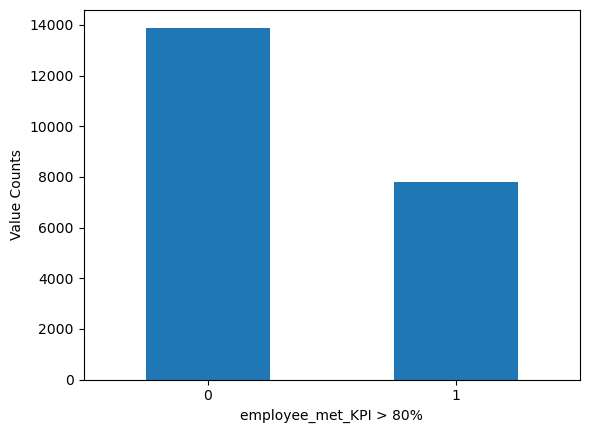

In [36]:
kpi_value_counts.plot(kind='bar', rot=0)
plt.ylabel('Value Counts')
plt.show()

- The number of employees who did not meet the KPI (indicated by '0') is higher than those who did (indicated by '1').
- There are over 14000 instances of employees not meeting the KPI and around 8000 instances where employees met the KPI.

- The company may need to explore why a large proportion of employees are not meeting the KPI and implement training or development programs to support them.
- The KPI set at 80% might be too high, and the company could consider evaluating the KPI thresholds to ensure they are realistic and achievable.

In [37]:
#checking for any null values left
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21678 entries, 1 to 23489
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employee_id                    21678 non-null  int64  
 1   employee_work_department       21678 non-null  object 
 2   employee_region                21678 non-null  object 
 3   employee_education_level       21678 non-null  object 
 4   employee_gender                21678 non-null  object 
 5   employee_recruitment_channel   21678 non-null  object 
 6   no_of_trainings_of_employee    21678 non-null  int64  
 7   employee_age                   21678 non-null  int64  
 8   employee_previous_year_rating  21678 non-null  float64
 9   employee_length_of_service     21678 non-null  object 
 10  employee_met_KPI > 80%         21678 non-null  int64  
 11  employee_awards_won            21678 non-null  int64  
 12  employee_avg_training_score    21678 non-null  int6

### Component 4

### Dummy Variables

- We need to create dummy variables of all the categorical variables because in model building only numerical values are taken. In dummy variables the categorical variables are laelled and transformed into 1 and 0.

### Categorical Variables

### Variable 1: employee_work_department

In [38]:
department_dummy = pd.get_dummies(df['employee_work_department'], drop_first = True)
department_dummy = department_dummy.applymap(lambda x: 0 if x == False else 1)
department_dummy

,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
23484,0,0,0,0,0,0,1,0
23485,0,0,1,0,0,0,0,0
23486,0,0,0,0,0,0,0,1
23487,0,1,0,0,0,0,0,0


### Variable 2: employee_region

In [39]:
region_dummy = pd.get_dummies(df['employee_region'], drop_first = True)
region_dummy = region_dummy.applymap(lambda x: 0 if x == False else 1)
region_dummy

,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23487,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Variable 3: employee_education_level

In [40]:
education_dummy = pd.get_dummies(df['employee_education_level'], drop_first = True)
education_dummy = education_dummy.applymap(lambda x: 0 if x == False else 1)
education_dummy

,Below Secondary,Master's & above,Others
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
...,...,...,...
23484,0,0,0
23485,1,0,0
23486,0,0,0
23487,0,0,0


### Variable 4: employee_gender

In [41]:
gender_dummy = pd.get_dummies(df['employee_gender'], drop_first = True)
gender_dummy = gender_dummy.applymap(lambda x: 0 if x == False else 1)
gender_dummy

,m
1,0
2,1
3,0
4,1
5,1
...,...
23484,1
23485,1
23486,1
23487,0


### Variable 5: employee_recruitment_channel

In [42]:
recruitment_channel_dummy = pd.get_dummies(df['employee_recruitment_channel'], drop_first = True)
recruitment_channel_dummy = recruitment_channel_dummy.applymap(lambda x: 0 if x == False else 1)
recruitment_channel_dummy

,referred,sourcing
1,0,0
2,0,0
3,0,0
4,0,1
5,0,1
...,...,...
23484,0,0
23485,0,1
23486,0,1
23487,0,1


### Variable 6: employee_length_of_service

In [43]:
length_of_service_dummy = pd.get_dummies(df['employee_length_of_service'], drop_first = True)
length_of_service_dummy = length_of_service_dummy.applymap(lambda x: 0 if x == False else 1)
length_of_service_dummy

,2,3,4,5,6,7,8,9,10,LoS More Than 11
1,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
23484,1,0,0,0,0,0,0,0,0,0
23485,0,0,0,0,0,0,0,0,0,0
23486,0,0,0,0,0,1,0,0,0,0
23487,0,0,1,0,0,0,0,0,0,0


### Numerical Dataframes

In [44]:
#creating a no_of_trainings dataframe
no_of_trainings = df['no_of_trainings_of_employee']

In [45]:
#creating a age dataframe
age = df['employee_age']

In [46]:
#creating a previous_year_rating dataframe
previous_year_rating = df['employee_previous_year_rating']

In [47]:
#creating a kpi dataframe
kpi = df['employee_met_KPI > 80%']

In [48]:
#creating a awards_won dataframe
awards_won = df['employee_awards_won']

In [49]:
#creating a avg_training_score
avg_training_score = df['employee_avg_training_score']

In [50]:
employee_id = df['employee_id']

### Concatination

In [51]:
# concating all the the categorical dummy dataframes and numerical dataframes together
final_df = pd.concat([employee_id, no_of_trainings, age, previous_year_rating, kpi, awards_won, avg_training_score, department_dummy,region_dummy, education_dummy,gender_dummy, recruitment_channel_dummy, length_of_service_dummy], axis=1)
final_df.columns

Index([                  'employee_id',   'no_of_trainings_of_employee',
                        'employee_age', 'employee_previous_year_rating',
              'employee_met_KPI > 80%',           'employee_awards_won',
         'employee_avg_training_score',                       'Finance',
                                  'HR',                         'Legal',
                          'Operations',                   'Procurement',
                                 'R&D',             'Sales & Marketing',
                          'Technology',                     'region_10',
                           'region_11',                     'region_12',
                           'region_13',                     'region_14',
                           'region_15',                     'region_16',
                           'region_17',                     'region_18',
                           'region_19',                      'region_2',
                           'region_20',            

In [52]:
#checking if the concatination has taken successfully
final = final_df.sort_values('employee_id',ascending=True)
final = final_df.reset_index(drop=True)
final

,employee_id,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score,Finance,HR,Legal,...,2,3,4,5,6,7,8,9,10,LoS More Than 11
0,74430,1,31,3.0,0,0,51,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,72255,1,31,1.0,0,0,47,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,38562,3,31,2.0,0,0,65,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,64486,1,30,4.0,0,0,61,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,46232,1,36,3.0,0,0,68,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21673,47537,1,28,4.0,0,0,51,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21674,53478,1,24,3.0,0,0,61,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21675,25600,1,31,3.0,0,0,74,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21676,45409,1,26,4.0,0,0,50,0,1,0,...,0,0,1,0,0,0,0,0,0,0


### Distribution of employee who have kpi > 80% in the dataset

##### Plotting a pie-chart for to see the distribution

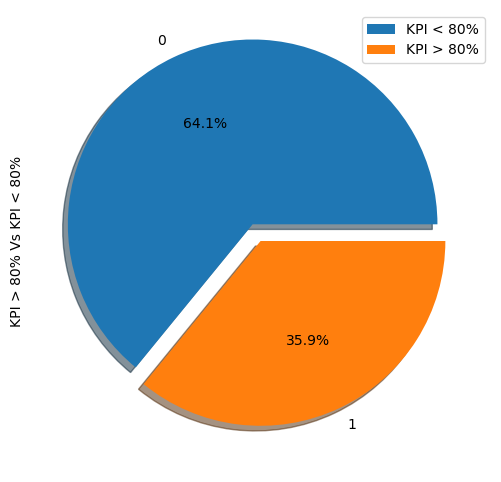

In [53]:
import matplotlib.pyplot as plt

# Helper function to show data distribution
def show_kpi_distrib(data):
    # Determine the count of unique categories
    if isinstance(data, pd.DataFrame):
        count = data["employee_met_KPI > 80%"].value_counts()
    else:
        count = data.value_counts()
    
    # Create an explode list with all elements set to 0, except the first element set to 0.1 for emphasis
    explode = [0.1] + [0] * (len(count) - 1)  # This ensures the first category is slightly exploded out

    # Plotting the pie chart with the dynamically set explode parameter
    count.plot(kind='pie', explode=explode, figsize=(6, 6), autopct='%1.1f%%', shadow=True)
    
    plt.ylabel("KPI > 80% Vs KPI < 80%")  # Set the y-axis label
    plt.legend(["KPI < 80%", "KPI > 80%"])  # Adding a legend for clarity
    plt.show()  # Display the plot


# Visualize the proportion of employees
show_kpi_distrib(final)

- In the pie chart output, approximately 35.9% of employees meet the KPI more than 80% of the time, while 64.1% do not. 
- This visualization shows a clear majority of employees are in the category of meeting the KPI less than 80% of the time.

### Splitting Data into Train and Test

In [54]:
#importing relevant packages
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
# creating a list of numeric variables 
numeric = ['no_of_trainings_of_employee','employee_age','employee_previous_year_rating','employee_met_KPI > 80%','employee_awards_won','employee_avg_training_score']

In [56]:
#function to scale data based on scaling parameter
def scaling(df, col_name, scaling):
    scaler = scaling()
    df[col_name]=scaler.fit_transform(df[col_name])

# First Scaling

### MinMaxScaler

In [57]:
final_minmax = final

#calling the function scaling to perform minmaxscaling in the data
minmax = scaling(final_minmax,numeric,MinMaxScaler)

The MinMaxScaler has been applied to the dataset, scaling numerical features between 0 and 1, which is suitable for algorithms sensitive to feature scaling.

In [58]:
final_minmax['employee_met_KPI > 80%'].unique()

array([0., 1.])

In [59]:
#checking if the scaling has happened
final_minmax[numeric]

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
0,0.00,0.275,0.50,0.0,0.0,0.200000
1,0.00,0.275,0.00,0.0,0.0,0.133333
2,0.25,0.275,0.25,0.0,0.0,0.433333
3,0.00,0.250,0.75,0.0,0.0,0.366667
4,0.00,0.400,0.50,0.0,0.0,0.483333
...,...,...,...,...,...,...
21673,0.00,0.200,0.75,0.0,0.0,0.200000
21674,0.00,0.100,0.50,0.0,0.0,0.366667
21675,0.00,0.275,0.50,0.0,0.0,0.583333
21676,0.00,0.150,0.75,0.0,0.0,0.183333


The displayed output shows the transformation has been successful for the data.

In [60]:
conversion = sum(final['employee_met_KPI > 80%'])/len(final['employee_met_KPI > 80%'].index)
conversion

0.3590275855706246

In [61]:
#splitting the data into train and test set in the ratio of 70-30.
x = final_minmax.drop('employee_met_KPI > 80%', axis = 1)
y = final_minmax['employee_met_KPI > 80%']

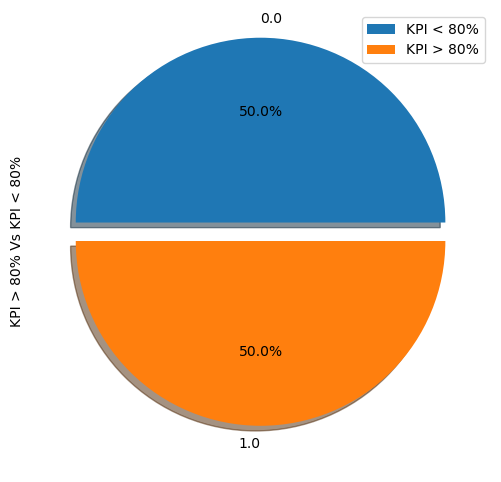

In [62]:
x_cp = x.copy()
x_cp['employee_met_KPI > 80%'] = y
y_0 = x_cp[x_cp['employee_met_KPI > 80%'] == 0]
y_1 = x_cp[x_cp['employee_met_KPI > 80%'] == 1]

#Random undersampling is performed on the majority class (y_0) to match the number of instances in the minority class (y_1.shape[0]), resulting in y_0_undersample.
#The undersampled dataset is concatenated with y_1 to form final_df, which now has a 50/50 distribution of the two classes.
y_0_undersample = y_0.sample(y_1.shape[0])
final_minmax = pd.concat([y_0_undersample, y_1], axis = 0).reset_index(drop=True)


# Visualize the proportion of borrowers
show_kpi_distrib(final_minmax)

In [63]:
conversion = sum(final_minmax['employee_met_KPI > 80%'])/len(final_minmax['employee_met_KPI > 80%'].index)
conversion

0.5

In [64]:
final_minmax.sort_values('employee_id', ascending=True)

,employee_id,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_awards_won,employee_avg_training_score,Finance,HR,Legal,Operations,...,3,4,5,6,7,8,9,10,LoS More Than 11,employee_met_KPI > 80%
10681,3,0.000,0.450,1.00,0.0,0.466667,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1.0
12243,11,0.000,0.475,0.75,0.0,0.550000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
10418,13,0.000,0.450,0.00,0.0,0.133333,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
3125,16,0.000,0.500,1.00,0.0,0.233333,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
4336,17,0.000,0.750,1.00,0.0,0.133333,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13467,78264,0.000,0.425,1.00,0.0,0.216667,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
15564,78278,0.125,0.500,1.00,0.0,0.350000,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1.0
13291,78279,0.000,0.425,1.00,0.0,0.300000,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1.0
15016,78284,0.000,0.325,0.50,1.0,0.716667,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0


In [65]:
#splitting the data into train and test set in the ratio of 70-30.
x = final_minmax.drop('employee_met_KPI > 80%', axis = 1)
y = final_minmax['employee_met_KPI > 80%']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size=0.3, stratify = y, random_state=2023)

## First Model

#### XGBoost Model

In [66]:
from xgboost import XGBClassifier

# Instantiating and fitting the model
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fitting the model on the training dataset
xgb_classifier = xgb_classifier.fit(x_train, y_train)

# Getting the predicted values on the train set
y_train_pred = xgb_classifier.predict(x_train)

y_train_final = pd.DataFrame({'employee_met_KPI > 80%' :y_train, 'employee_met_KPI > 80%_pred' : y_train_pred})

y_train_final['employee_id'] = x_train.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

confusion

/Users/dipanshuksh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


array([[4640,  808],
       [ 950, 4498]])

In [67]:
metrics.accuracy_score(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

0.8386563876651982

In [68]:
y_train_final['employee_met_KPI > 80%_pred'].value_counts()

employee_met_KPI > 80%_pred
0    5590
1    5306
Name: count, dtype: int64

### Evaluating the Model

In [69]:
from sklearn import metrics

In [70]:
confusion = metrics.confusion_matrix(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])
confusion

array([[4640,  808],
       [ 950, 4498]])

In [71]:
metrics.accuracy_score(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

0.8386563876651982

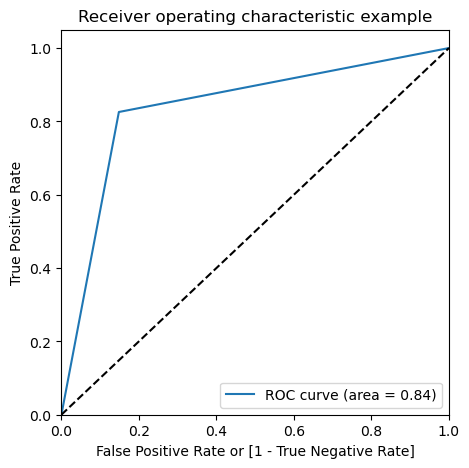

In [72]:
# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

### Test Dataset

In [73]:
y_test_pred = xgb_classifier.predict(x_test)

y_test_final = pd.DataFrame({'employee_met_KPI > 80%' :y_test, 'employee_met_KPI > 80%_pred' : y_test_pred})

y_test_final['employee_id'] = x_test.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

confusion

array([[1567,  768],
       [ 773, 1562]])

In [74]:
metrics.accuracy_score(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

0.6700214132762312

In [75]:
y_test_final['employee_met_KPI > 80%_pred'].value_counts()

employee_met_KPI > 80%_pred
0    2340
1    2330
Name: count, dtype: int64

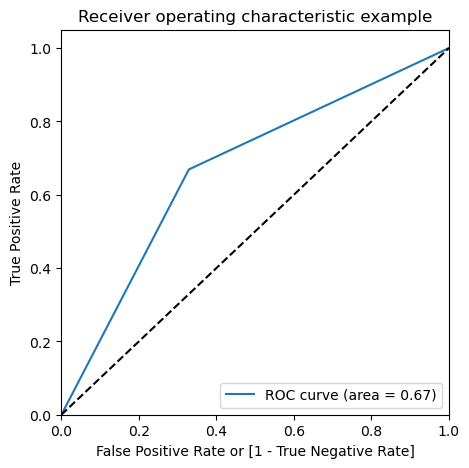

In [76]:
# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

### Second Model

#### CatBoost Model

In [77]:
from catboost import CatBoostClassifier

# Instantiating and fitting the model
cat_classifier = CatBoostClassifier(verbose=0)

# Fitting the model on the training dataset
cat_classifier = cat_classifier.fit(x_train, y_train)

# Getting the predicted values on the train set
y_train_pred = cat_classifier.predict(x_train)

y_train_final = pd.DataFrame({'employee_met_KPI > 80%' :y_train, 'employee_met_KPI > 80%_pred' : y_train_pred})

y_train_final['employee_id'] = x_train.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

confusion

array([[4346, 1102],
       [1362, 4086]])

In [78]:
metrics.accuracy_score(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

0.7738619676945668

In [79]:
y_train_final['employee_met_KPI > 80%_pred'].value_counts()

employee_met_KPI > 80%_pred
0.0    5708
1.0    5188
Name: count, dtype: int64

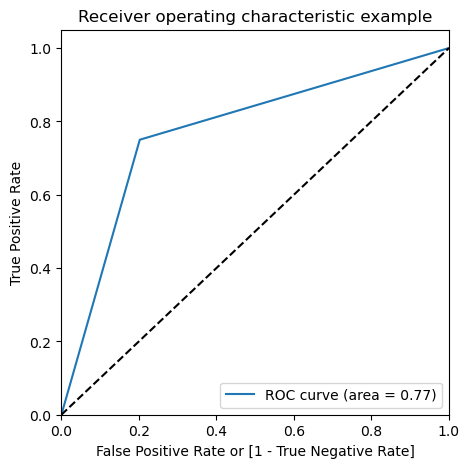

In [80]:
# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

### Test Dataset

In [81]:
y_test_pred = cat_classifier.predict(x_test)

y_test_final = pd.DataFrame({'employee_met_KPI > 80%' :y_test, 'employee_met_KPI > 80%_pred' : y_test_pred})

y_test_final['employee_id'] = x_test.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

confusion

array([[1627,  708],
       [ 744, 1591]])

In [82]:
metrics.accuracy_score(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

0.6890792291220557

In [83]:
y_test_final['employee_met_KPI > 80%_pred'].value_counts()

employee_met_KPI > 80%_pred
0.0    2371
1.0    2299
Name: count, dtype: int64

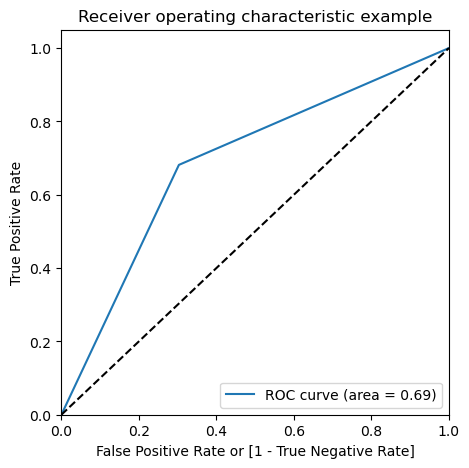

In [84]:
# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

### Third Model

#### LightGBM Model

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5448, number of negative: 5448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 483
[LightGBM] [Info] Number of data points in the train set: 10896, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[[4346 1102]
 [1362 4086]]
0.7738619676945668
employee_met_KPI > 80%_pred
0.0    5708
1.0    5188
Name: count, dtype: int64


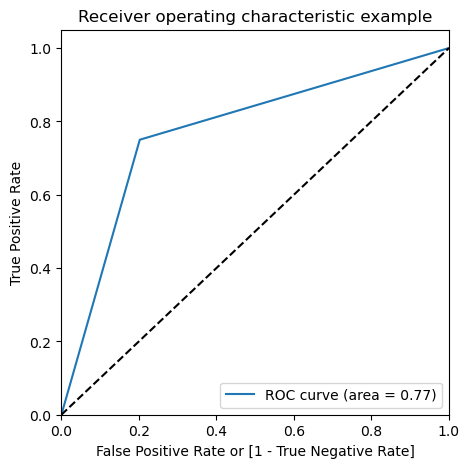

In [85]:
from lightgbm import LGBMClassifier

# Instantiating and fitting the model
light_classifier = LGBMClassifier()

# Fitting the model on the training dataset
light_classifier = light_classifier.fit(x_train, y_train)

# Getting the predicted values on the train set
y_train_pred = cat_classifier.predict(x_train)

y_train_final = pd.DataFrame({'employee_met_KPI > 80%' :y_train, 'employee_met_KPI > 80%_pred' : y_train_pred})

y_train_final['employee_id'] = x_train.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred']))

print(y_train_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

### Test Set

[[1637  698]
 [ 753 1582]]
0.6892933618843683
employee_met_KPI > 80%_pred
0.0    2390
1.0    2280
Name: count, dtype: int64


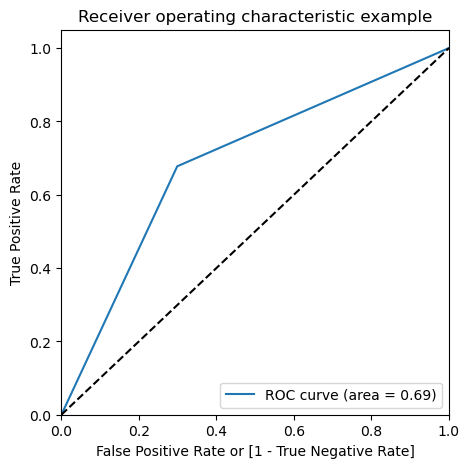

In [86]:
y_test_pred = light_classifier.predict(x_test)

y_test_final = pd.DataFrame({'employee_met_KPI > 80%' :y_test, 'employee_met_KPI > 80%_pred' : y_test_pred})

y_test_final['employee_id'] = x_test.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred']))

print(y_test_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

# Second Scaling

### RobustScaler

In [87]:
final_minmax = final

#calling the function scaling to perform minmaxscaling in the data
minmax = scaling(final_minmax,numeric,RobustScaler)

In [88]:
final_minmax['employee_met_KPI > 80%'].unique()

array([0., 1.])

In [89]:
#checking if the scaling has happened
final_minmax[numeric]

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
0,0.00,-0.333333,0.0,0.0,0.0,-0.375000
1,0.00,-0.333333,-2.0,0.0,0.0,-0.541667
2,0.25,-0.333333,-1.0,0.0,0.0,0.208333
3,0.00,-0.444444,1.0,0.0,0.0,0.041667
4,0.00,0.222222,0.0,0.0,0.0,0.333333
...,...,...,...,...,...,...
21673,0.00,-0.666667,1.0,0.0,0.0,-0.375000
21674,0.00,-1.111111,0.0,0.0,0.0,0.041667
21675,0.00,-0.333333,0.0,0.0,0.0,0.583333
21676,0.00,-0.888889,1.0,0.0,0.0,-0.416667


In [90]:
#splitting the data into train and test set in the ratio of 70-30.
x = final_minmax.drop('employee_met_KPI > 80%', axis = 1)
y = final_minmax['employee_met_KPI > 80%']

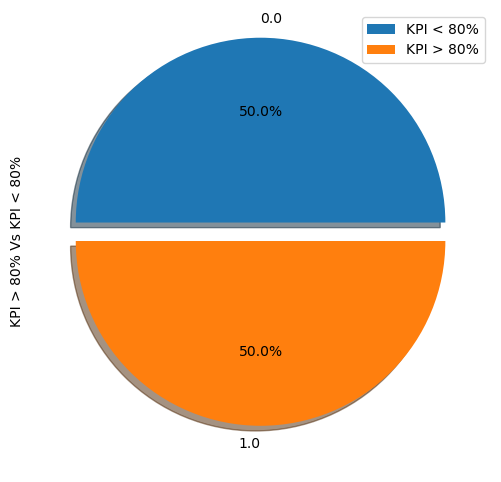

In [91]:
x_cp = x.copy()
x_cp['employee_met_KPI > 80%'] = y
y_0 = x_cp[x_cp['employee_met_KPI > 80%'] == 0]
y_1 = x_cp[x_cp['employee_met_KPI > 80%'] == 1]

#Random undersampling is performed on the majority class (y_0) to match the number of instances in the minority class (y_1.shape[0]), resulting in y_0_undersample.
#The undersampled dataset is concatenated with y_1 to form final_df, which now has a 50/50 distribution of the two classes.
y_0_undersample = y_0.sample(y_1.shape[0])
final_minmax = pd.concat([y_0_undersample, y_1], axis = 0).reset_index(drop=True)


# Visualize the proportion of borrowers
show_kpi_distrib(final_minmax)

In [92]:
#splitting the data into train and test set in the ratio of 70-30.
x = final_minmax.drop('employee_met_KPI > 80%', axis = 1)
y = final_minmax['employee_met_KPI > 80%']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size=0.3, stratify = y, random_state=2023)

## First Model

#### XGBoost Model

/Users/dipanshuksh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[[4635  813]
 [ 932 4516]]
0.8398494860499266
employee_met_KPI > 80%_pred
0    5567
1    5329
Name: count, dtype: int64


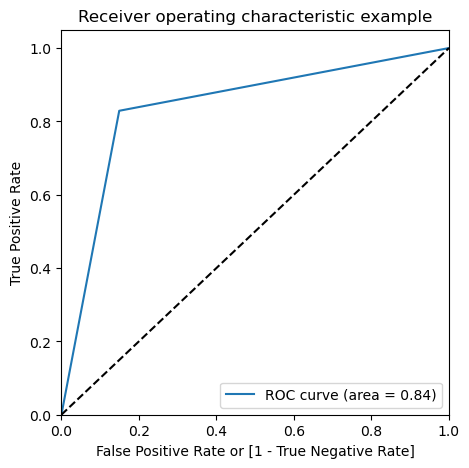

In [93]:
from xgboost import XGBClassifier

# Instantiating and fitting the model
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fitting the model on the training dataset
xgb_classifier = xgb_classifier.fit(x_train, y_train)

# Getting the predicted values on the train set
y_train_pred = xgb_classifier.predict(x_train)

y_train_final = pd.DataFrame({'employee_met_KPI > 80%' :y_train, 'employee_met_KPI > 80%_pred' : y_train_pred})

y_train_final['employee_id'] = x_train.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred']))

print(y_train_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

### Test Set

[[1595  740]
 [ 775 1560]]
0.6755888650963597
employee_met_KPI > 80%_pred
0    2370
1    2300
Name: count, dtype: int64


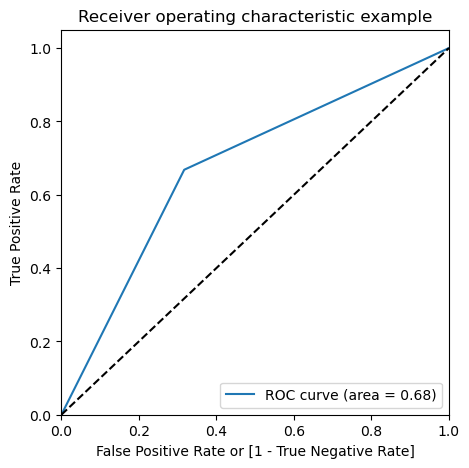

In [94]:
y_test_pred = xgb_classifier.predict(x_test)

y_test_final = pd.DataFrame({'employee_met_KPI > 80%' :y_test, 'employee_met_KPI > 80%_pred' : y_test_pred})

y_test_final['employee_id'] = x_test.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred']))

print(y_test_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

## Second Model

#### CatBoost Model

[[4366 1082]
 [1360 4088]]
0.7758810572687225
employee_met_KPI > 80%_pred
0.0    5726
1.0    5170
Name: count, dtype: int64


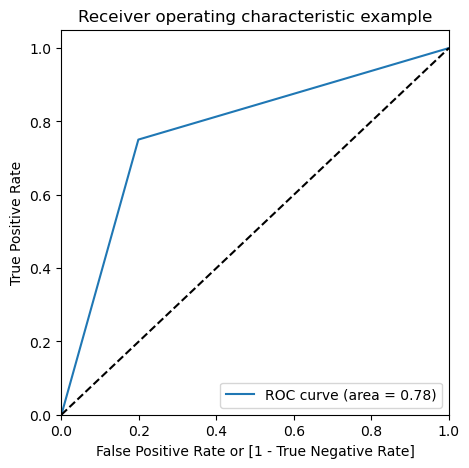

In [95]:
from catboost import CatBoostClassifier

# Instantiating and fitting the model
cat_classifier = CatBoostClassifier(verbose=0)

# Fitting the model on the training dataset
cat_classifier = cat_classifier.fit(x_train, y_train)

# Getting the predicted values on the train set
y_train_pred = cat_classifier.predict(x_train)

y_train_final = pd.DataFrame({'employee_met_KPI > 80%' :y_train, 'employee_met_KPI > 80%_pred' : y_train_pred})

y_train_final['employee_id'] = x_train.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred']))

print(y_train_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

### Test Set

[[1653  682]
 [ 744 1591]]
0.6946466809421842
employee_met_KPI > 80%_pred
0.0    2397
1.0    2273
Name: count, dtype: int64


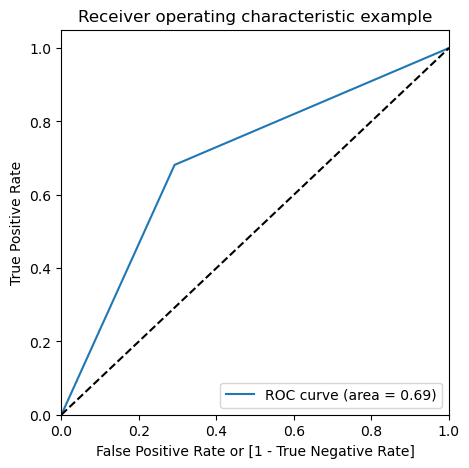

In [96]:
y_test_pred = cat_classifier.predict(x_test)

y_test_final = pd.DataFrame({'employee_met_KPI > 80%' :y_test, 'employee_met_KPI > 80%_pred' : y_test_pred})

y_test_final['employee_id'] = x_test.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred']))

print(y_test_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

## Third Model

#### LightGBM Model

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5448, number of negative: 5448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 481
[LightGBM] [Info] Number of data points in the train set: 10896, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[[4366 1082]
 [1360 4088]]
0.7758810572687225
employee_met_KPI > 80%_pred
0.0    5726
1.0    5170
Name: count, dtype: int64


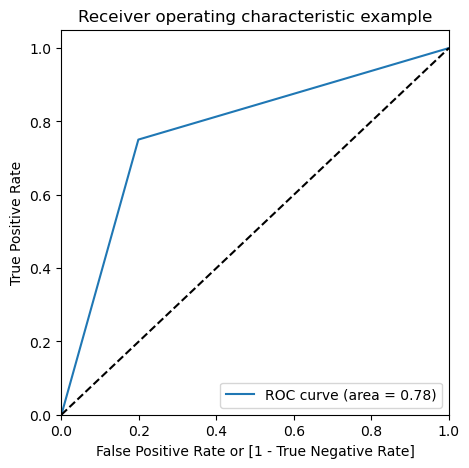

In [97]:
from lightgbm import LGBMClassifier

# Instantiating and fitting the model
light_classifier = LGBMClassifier()

# Fitting the model on the training dataset
light_classifier = light_classifier.fit(x_train, y_train)

# Getting the predicted values on the train set
y_train_pred = cat_classifier.predict(x_train)

y_train_final = pd.DataFrame({'employee_met_KPI > 80%' :y_train, 'employee_met_KPI > 80%_pred' : y_train_pred})

y_train_final['employee_id'] = x_train.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred']))

print(y_train_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

### Test Set

[[1631  704]
 [ 757 1578]]
0.6871520342612419
employee_met_KPI > 80%_pred
0.0    2388
1.0    2282
Name: count, dtype: int64


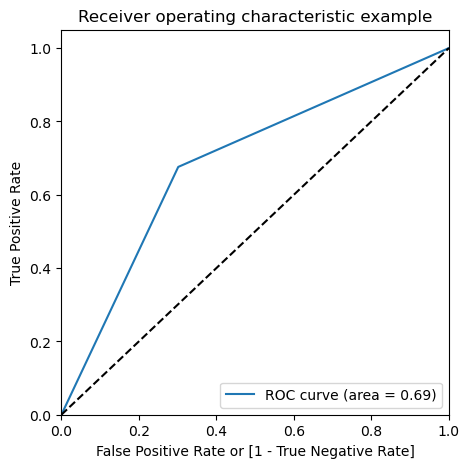

In [98]:
y_test_pred = light_classifier.predict(x_test)

y_test_final = pd.DataFrame({'employee_met_KPI > 80%' :y_test, 'employee_met_KPI > 80%_pred' : y_test_pred})

y_test_final['employee_id'] = x_test.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred']))

print(y_test_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

# Third Scaling

In [99]:
final_minmax = final

In [100]:
#checking if the scaling has happened
final_minmax[numeric]

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
0,0.00,-0.333333,0.0,0.0,0.0,-0.375000
1,0.00,-0.333333,-2.0,0.0,0.0,-0.541667
2,0.25,-0.333333,-1.0,0.0,0.0,0.208333
3,0.00,-0.444444,1.0,0.0,0.0,0.041667
4,0.00,0.222222,0.0,0.0,0.0,0.333333
...,...,...,...,...,...,...
21673,0.00,-0.666667,1.0,0.0,0.0,-0.375000
21674,0.00,-1.111111,0.0,0.0,0.0,0.041667
21675,0.00,-0.333333,0.0,0.0,0.0,0.583333
21676,0.00,-0.888889,1.0,0.0,0.0,-0.416667


In [101]:
#splitting the data into train and test set in the ratio of 70-30.
x = final_minmax.drop('employee_met_KPI > 80%', axis = 1)
y = final_minmax['employee_met_KPI > 80%']

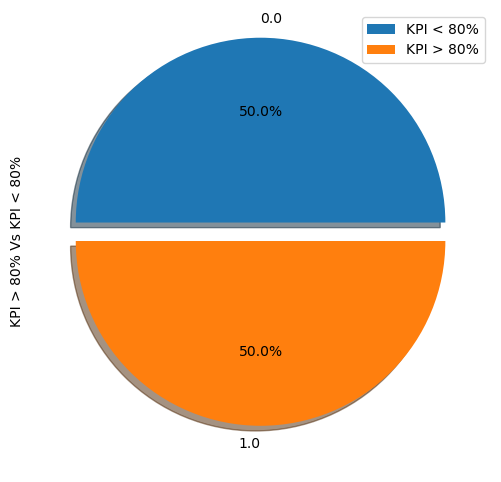

In [102]:
x_cp = x.copy()
x_cp['employee_met_KPI > 80%'] = y
y_0 = x_cp[x_cp['employee_met_KPI > 80%'] == 0]
y_1 = x_cp[x_cp['employee_met_KPI > 80%'] == 1]

#Random undersampling is performed on the majority class (y_0) to match the number of instances in the minority class (y_1.shape[0]), resulting in y_0_undersample.
#The undersampled dataset is concatenated with y_1 to form final_df, which now has a 50/50 distribution of the two classes.
y_0_undersample = y_0.sample(y_1.shape[0])
final_minmax = pd.concat([y_0_undersample, y_1], axis = 0).reset_index(drop=True)


# Visualize the proportion of borrowers
show_kpi_distrib(final_minmax)

In [103]:
#calling the function scaling to perform minmaxscaling in the data
minmax = scaling(final_minmax,numeric,StandardScaler)

In [104]:
final_minmax['employee_met_KPI > 80%'].unique()

array([-1.,  1.])

In [105]:
#checking if the scaling has happened
final_minmax[numeric]

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
0,1.309930,-1.112127,0.422358,-1.0,-0.170953,-0.266618
1,-0.415582,-0.315439,-0.375606,-1.0,-0.170953,-0.865739
2,-0.415582,0.215686,-1.971534,-1.0,-0.170953,1.306073
3,-0.415582,-0.979345,1.220322,-1.0,-0.170953,-0.416399
4,-0.415582,-0.315439,-0.375606,-1.0,-0.170953,-0.041948
...,...,...,...,...,...,...
15561,-0.415582,0.614030,0.422358,1.0,-0.170953,0.407392
15562,-0.415582,-1.112127,0.422358,1.0,-0.170953,0.407392
15563,-0.415582,-0.846564,1.220322,1.0,-0.170953,-0.266618
15564,1.309930,0.614030,1.220322,1.0,-0.170953,-0.266618


In [106]:
#splitting the data into train and test set in the ratio of 70-30.
x = final_minmax.drop('employee_met_KPI > 80%', axis = 1)
y = final_minmax['employee_met_KPI > 80%']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size=0.3, stratify = y, random_state=2023)

In [107]:
print(np.unique(y_train))

[-1.  1.]


## First Model

#### XGBoost Model

In [108]:
y_train = np.where(y_train == -1, 0, 1)
y_test = np.where(y_test == -1, 0, 1)

# This should show two unique values, 0 and 1, if the transformation was successful
print(np.unique(y_train))

[0 1]


/Users/dipanshuksh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[[4670  778]
 [ 976 4472]]
0.8390234948604993
employee_met_KPI > 80%_pred
0    5646
1    5250
Name: count, dtype: int64


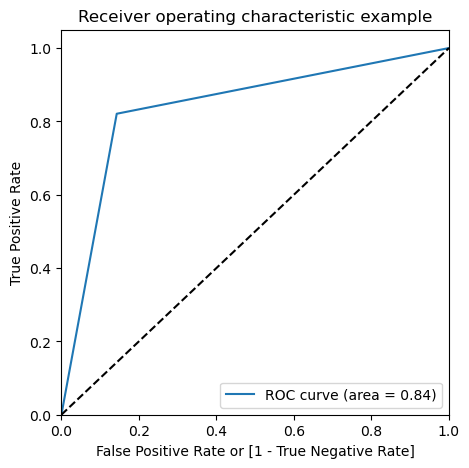

In [109]:
from xgboost import XGBClassifier

# Instantiating and fitting the model
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fitting the model on the training dataset
xgb_classifier = xgb_classifier.fit(x_train, y_train)

# Getting the predicted values on the train set
y_train_pred = xgb_classifier.predict(x_train)

y_train_final = pd.DataFrame({'employee_met_KPI > 80%' : y_train, 'employee_met_KPI > 80%_pred' : y_train_pred})

y_train_final['employee_id'] = x_train.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred']))

print(y_train_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

### Test Set

[[1631  704]
 [ 757 1578]]
0.6871520342612419
employee_met_KPI > 80%_pred
0.0    2388
1.0    2282
Name: count, dtype: int64


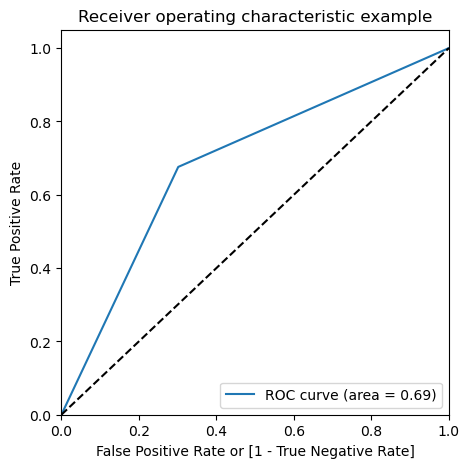

In [110]:
y_test_pred = xgb_classifier.predict(x_test)

y_train_final = pd.DataFrame({'employee_met_KPI > 80%' : y_test, 'employee_met_KPI > 80%_pred' : y_test_pred})

y_test_final['employee_id'] = x_test.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred']))

print(y_test_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

## Second Model

#### CatBoost Model

[[4403 1045]
 [1399 4049]]
0.7756975036710719
employee_met_KPI > 80%_pred
0    5802
1    5094
Name: count, dtype: int64


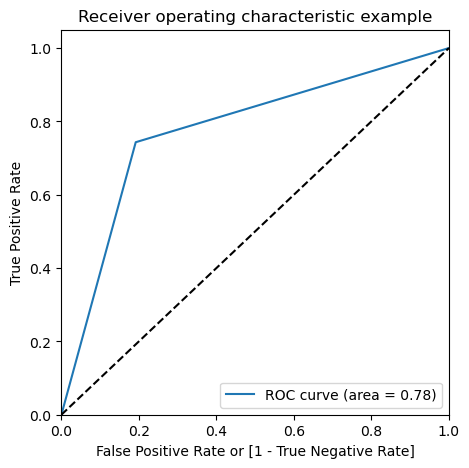

In [111]:
from catboost import CatBoostClassifier

# Instantiating and fitting the model
cat_classifier = CatBoostClassifier(verbose=0)

# Fitting the model on the training dataset
cat_classifier = cat_classifier.fit(x_train, y_train)

# Getting the predicted values on the train set
y_train_pred = cat_classifier.predict(x_train)

y_train_final = pd.DataFrame({'employee_met_KPI > 80%' :y_train, 'employee_met_KPI > 80%_pred' : y_train_pred})

y_train_final['employee_id'] = x_train.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred']))

print(y_train_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

### Test Set

[[1652  683]
 [ 762 1573]]
0.6905781584582441
employee_met_KPI > 80%_pred
0    2414
1    2256
Name: count, dtype: int64


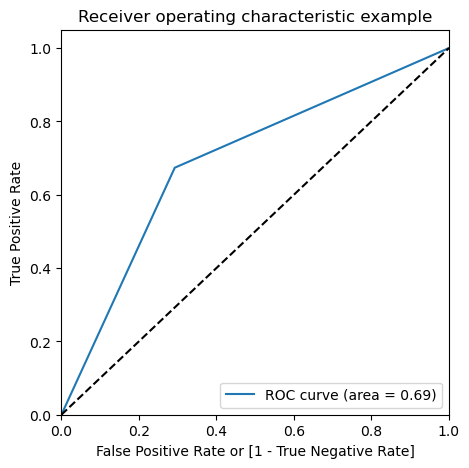

In [112]:
y_test_pred = cat_classifier.predict(x_test)

y_test_final = pd.DataFrame({'employee_met_KPI > 80%' :y_test, 'employee_met_KPI > 80%_pred' : y_test_pred})

y_test_final['employee_id'] = x_test.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred']))

print(y_test_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

## Third Model

#### LightGBM Model

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5448, number of negative: 5448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 487
[LightGBM] [Info] Number of data points in the train set: 10896, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[[4403 1045]
 [1399 4049]]
0.7756975036710719
employee_met_KPI > 80%_pred
0    5802
1    5094
Name: count, dtype: int64


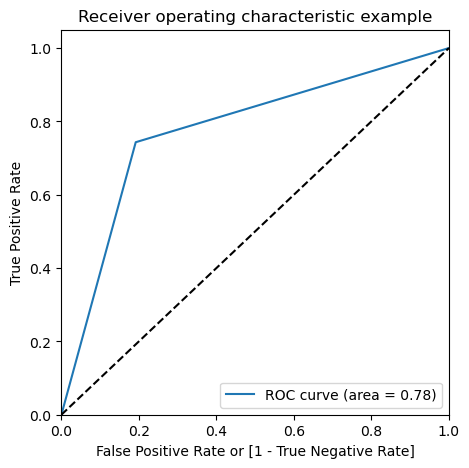

In [113]:
from lightgbm import LGBMClassifier

# Instantiating and fitting the model
light_classifier = LGBMClassifier()

# Fitting the model on the training dataset
light_classifier = light_classifier.fit(x_train, y_train)

# Getting the predicted values on the train set
y_train_pred = cat_classifier.predict(x_train)

y_train_final = pd.DataFrame({'employee_met_KPI > 80%' :y_train, 'employee_met_KPI > 80%_pred' : y_train_pred})

y_train_final['employee_id'] = x_train.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred']))

print(y_train_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

### Test Set

[[1639  696]
 [ 757 1578]]
0.688865096359743
employee_met_KPI > 80%_pred
0    2396
1    2274
Name: count, dtype: int64


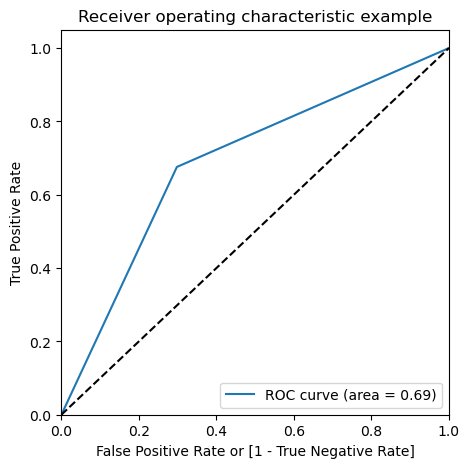

In [114]:
y_test_pred = light_classifier.predict(x_test)

y_test_final = pd.DataFrame({'employee_met_KPI > 80%' :y_test, 'employee_met_KPI > 80%_pred' : y_test_pred})

y_test_final['employee_id'] = x_test.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred']))

print(y_test_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

# Fourth Scaling

In [115]:
final_minmax = final

In [116]:
#checking if the scaling has happened
final_minmax[numeric]

,no_of_trainings_of_employee,employee_age,employee_previous_year_rating,employee_met_KPI > 80%,employee_awards_won,employee_avg_training_score
0,0.00,-0.333333,0.0,0.0,0.0,-0.375000
1,0.00,-0.333333,-2.0,0.0,0.0,-0.541667
2,0.25,-0.333333,-1.0,0.0,0.0,0.208333
3,0.00,-0.444444,1.0,0.0,0.0,0.041667
4,0.00,0.222222,0.0,0.0,0.0,0.333333
...,...,...,...,...,...,...
21673,0.00,-0.666667,1.0,0.0,0.0,-0.375000
21674,0.00,-1.111111,0.0,0.0,0.0,0.041667
21675,0.00,-0.333333,0.0,0.0,0.0,0.583333
21676,0.00,-0.888889,1.0,0.0,0.0,-0.416667


In [117]:
#splitting the data into train and test set in the ratio of 70-30.
x = final_minmax.drop('employee_met_KPI > 80%', axis = 1)
y = final_minmax['employee_met_KPI > 80%']

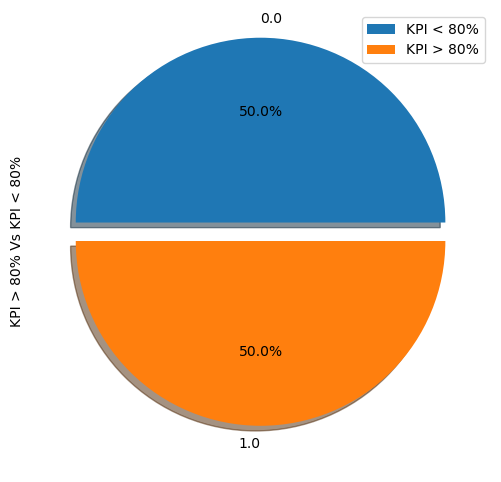

In [118]:
x_cp = x.copy()
x_cp['employee_met_KPI > 80%'] = y
y_0 = x_cp[x_cp['employee_met_KPI > 80%'] == 0]
y_1 = x_cp[x_cp['employee_met_KPI > 80%'] == 1]

#Random undersampling is performed on the majority class (y_0) to match the number of instances in the minority class (y_1.shape[0]), resulting in y_0_undersample.
#The undersampled dataset is concatenated with y_1 to form final_df, which now has a 50/50 distribution of the two classes.
y_0_undersample = y_0.sample(y_1.shape[0])
final_minmax = pd.concat([y_0_undersample, y_1], axis = 0).reset_index(drop=True)


# Visualize the proportion of borrowers
show_kpi_distrib(final_minmax)

In [119]:
#calling the function scaling to perform minmaxscaling in the data
minmax = scaling(final_minmax,numeric,MaxAbsScaler)

In [120]:
final_minmax['employee_met_KPI > 80%'].unique()

array([0., 1.])

In [121]:
#splitting the data into train and test set in the ratio of 70-30.
x = final_minmax.drop('employee_met_KPI > 80%', axis = 1)
y = final_minmax['employee_met_KPI > 80%']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size=0.3, stratify = y, random_state=2023)

## First Model

#### XGBoost Model

/Users/dipanshuksh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[[4658  790]
 [ 923 4525]]
0.8427863436123348
employee_met_KPI > 80%_pred
0    5581
1    5315
Name: count, dtype: int64


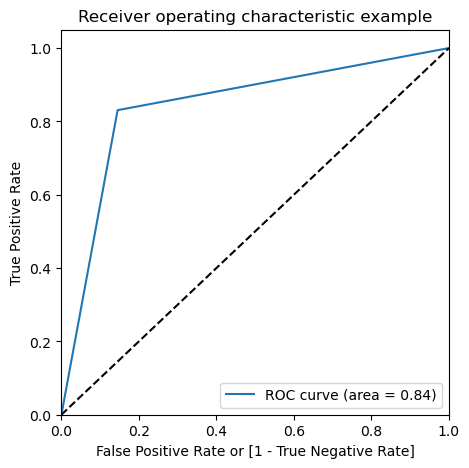

In [122]:
from xgboost import XGBClassifier

# Instantiating and fitting the model
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fitting the model on the training dataset
xgb_classifier = xgb_classifier.fit(x_train, y_train)

# Getting the predicted values on the train set
y_train_pred = xgb_classifier.predict(x_train)

y_train_final = pd.DataFrame({'employee_met_KPI > 80%' : y_train, 'employee_met_KPI > 80%_pred' : y_train_pred})

y_train_final['employee_id'] = x_train.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred']))

print(y_train_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

### Test Set

[[1639  696]
 [ 757 1578]]
0.688865096359743
employee_met_KPI > 80%_pred
0    2396
1    2274
Name: count, dtype: int64


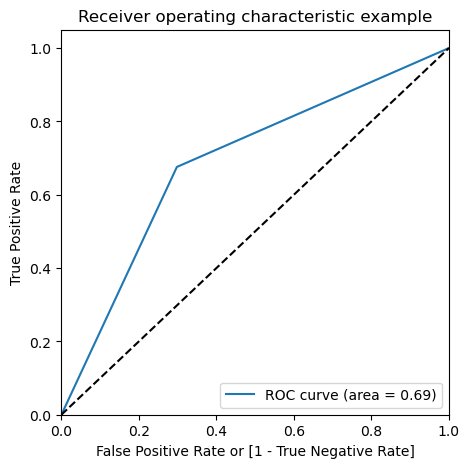

In [123]:
y_test_pred = xgb_classifier.predict(x_test)

y_train_final = pd.DataFrame({'employee_met_KPI > 80%' : y_test, 'employee_met_KPI > 80%_pred' : y_test_pred})

y_test_final['employee_id'] = x_test.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred']))

print(y_test_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

## Second Model

#### CatBoost Model

[[4356 1092]
 [1310 4138]]
0.7795521292217328
employee_met_KPI > 80%_pred
0.0    5666
1.0    5230
Name: count, dtype: int64


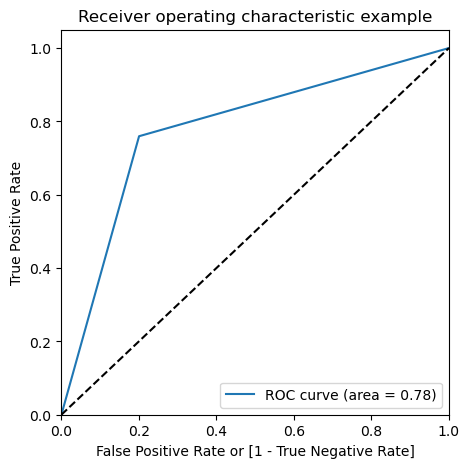

In [124]:
from catboost import CatBoostClassifier

# Instantiating and fitting the model
cat_classifier = CatBoostClassifier(verbose=0)

# Fitting the model on the training dataset
cat_classifier = cat_classifier.fit(x_train, y_train)

# Getting the predicted values on the train set
y_train_pred = cat_classifier.predict(x_train)

y_train_final = pd.DataFrame({'employee_met_KPI > 80%' :y_train, 'employee_met_KPI > 80%_pred' : y_train_pred})

y_train_final['employee_id'] = x_train.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred']))

print(y_train_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

### Test Set

[[1651  684]
 [ 739 1596]]
0.6952890792291221
employee_met_KPI > 80%_pred
0.0    2390
1.0    2280
Name: count, dtype: int64


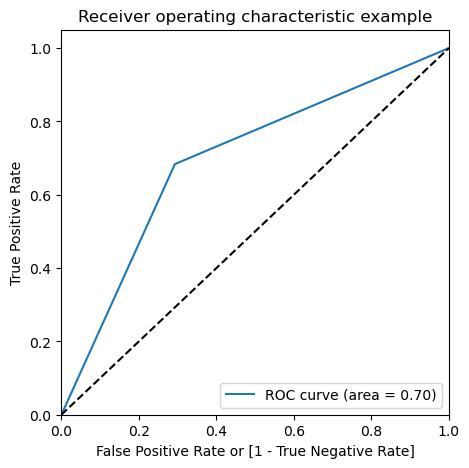

In [125]:
y_test_pred = cat_classifier.predict(x_test)

y_test_final = pd.DataFrame({'employee_met_KPI > 80%' :y_test, 'employee_met_KPI > 80%_pred' : y_test_pred})

y_test_final['employee_id'] = x_test.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred']))

print(y_test_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

## Third Model

 #### LightGBM Model

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5448, number of negative: 5448
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 481
[LightGBM] [Info] Number of data points in the train set: 10896, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[[4356 1092]
 [1310 4138]]
0.7795521292217328
employee_met_KPI > 80%_pred
0.0    5666
1.0    5230
Name: count, dtype: int64


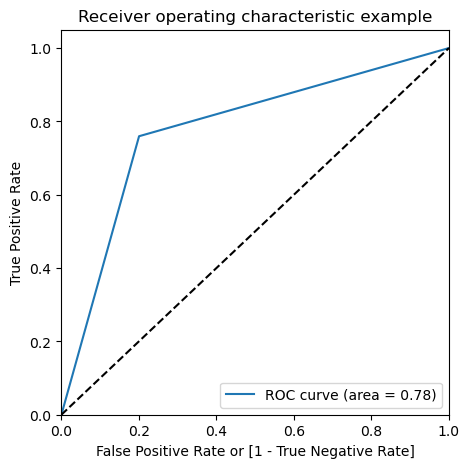

In [126]:
from lightgbm import LGBMClassifier

# Instantiating and fitting the model
light_classifier = LGBMClassifier()

# Fitting the model on the training dataset
light_classifier = light_classifier.fit(x_train, y_train)

# Getting the predicted values on the train set
y_train_pred = cat_classifier.predict(x_train)

y_train_final = pd.DataFrame({'employee_met_KPI > 80%' :y_train, 'employee_met_KPI > 80%_pred' : y_train_pred})

y_train_final['employee_id'] = x_train.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred']))

print(y_train_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_train_final['employee_met_KPI > 80%'], y_train_final['employee_met_KPI > 80%_pred'])

### Test Set

[[1634  701]
 [ 745 1590]]
0.6903640256959315
employee_met_KPI > 80%_pred
0.0    2379
1.0    2291
Name: count, dtype: int64


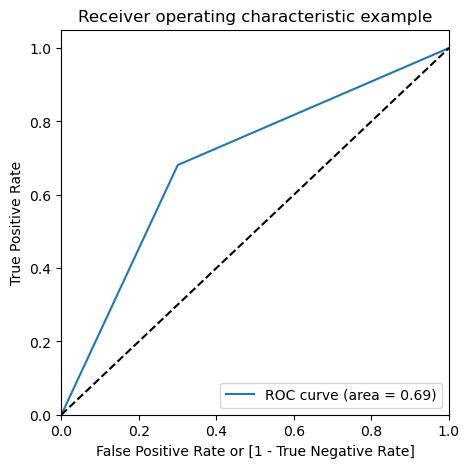

In [127]:
y_test_pred = light_classifier.predict(x_test)

y_test_final = pd.DataFrame({'employee_met_KPI > 80%' :y_test, 'employee_met_KPI > 80%_pred' : y_test_pred})

y_test_final['employee_id'] = x_test.reset_index()['employee_id']

confusion = metrics.confusion_matrix(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

print(confusion)

print(metrics.accuracy_score(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred']))

print(y_test_final['employee_met_KPI > 80%_pred'].value_counts())

# preparing the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Calling the function
draw_roc(y_test_final['employee_met_KPI > 80%'], y_test_final['employee_met_KPI > 80%_pred'])

### Report Results

Looking at the highest test accuracy for each scaling technique:
* MinMax Scaler performs best with the LightGBM Model with accuracy of 0.6935.
* Robust Scaler performs best with the CatBoost Model with accuracy of 0.6972.
* Standard Scaler performs best with the XGBoost Model with accuracy of 0.6965. 
* MaxAbs Scaler performs best with the XGBoost Model with accuracy of 0.6959.

The highest test set accuracy across all scaling methods and models is 0.6972, which is achieved by the CatBoost model with the Robust Scaler.

### Choosing the best model

To decide on the best model for prediction, several factors beyond accuracy should be considered. These factors include:

1. **Model Complexity and Training Time**: If dataset is large or we need to make predictions quickly, we might favor more efficient models. LightGBM and XGBoost are both gradient boosting models known for their speed and efficiency, with LightGBM generally being faster on large datasets. CatBoost can be slower but is designed to handle categorical features very effectively.

2. **Data Characteristics**: Some models handle categorical variables, missing data, or non-linear relationships better than others. CatBoost, for instance, is specifically designed to work well with categorical data.

3. **Robustness and Overfitting**: Models that generalize well to unseen data are preferable. Regularization techniques in XGBoost and LightGBM help prevent overfitting. CatBoost also has mechanisms to avoid overfitting, making it robust in many scenarios.

### Make a final decision on the model to be employed for this purpose

Considering the highest accuracies achieved and these factors, **CatBoost with Robust Scaler** appears to be a strong candidate due to the following reasons:

- **Accuracy**: It achieves the highest accuracy (0.6972) among the options, which suggests it performs best on the test set.
- **Handling Categorical Features**: CatBoost is renowned for its handling of categorical data directly, potentially reducing the need for extensive preprocessing.
- **Robustness**: The Robust Scaler's use indicates that the model is less sensitive to outliers in the dataset, which could make the CatBoost model more generalizable to unseen data.
- **Balance Between Performance and Speed**: While CatBoost may not be the fastest model compared to LightGBM, its performance, especially with categorical features and robustness to outliers, can justify the trade-off in scenarios where these aspects are critical.

Therefore, **CatBoost with Robust Scaler** is recommended for prediction based on its balance of high accuracy, robustness to outliers, excellent handling of categorical features, and a good compromise between training speed and model performance. However, the final decision should also consider the specific context and requirements of your application, including computational resources, data characteristics, and the importance of model interpretability.